<a href="https://colab.research.google.com/github/alfinmaulani/skripsi/blob/master/ekstraksi_dan_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import

In [16]:
import pandas as pd
import numpy as np
import gensim
import nltk
from nltk.tokenize import word_tokenize
from gensim.models import word2vec

load file

In [15]:
url = 'https://raw.githubusercontent.com/alfinmaulani/skripsi/master/dataisearpreutama.csv'
df = pd.read_csv(url)
# model=word2vec'https://github.com/alfinmaulani/skripsi/blob/master/w2v(-).model?raw=true'
model = gensim.models.word2vec.Word2Vec.load('https://github.com/alfinmaulani/skripsi/blob/master/w2v(-).model?raw=true')

In [19]:
df.head()
df.emosi

0           joy
1          fear
2         anger
3       sadness
4       disgust
         ...   
7511      shame
7512      shame
7513       fear
7514      guilt
7515       fear
Name: emosi, Length: 7516, dtype: object

In [20]:
cek=model.wv

# (untuk melihat trained word) 
# model.wv.index2word
# melihat fitur kata tertentu
# model.wv["moment"]
# melihat berapa banyak fitur
model.wv.vector_size

100

sanity check

In [ ]:
#similiar word
cek.similar_by_word("me")

[('go', 0.9962377548217773),
 ('asked', 0.9952147603034973),
 ('promised', 0.9946995377540588),
 ('able', 0.9942578673362732),
 ('he', 0.9942370653152466),
 ('be', 0.993609607219696),
 ('wanted', 0.9935912489891052),
 ('help', 0.9932869672775269),
 ('they', 0.993200421333313),
 ('speak', 0.9931195974349976)]

In [ ]:
#higher order visualitation

In [ ]:
import sklearn.datasets
!pip install umap-learn[plot]

import plotly.express as px

In [ ]:
from umap import UMAP

x = UMAP().fit_transform(cek.vectors)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning:

The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.



In [ ]:
vis=pd.DataFrame(x, columns=["Umap1","Umap2"])
vis["dokumen"]=cek.index2word

In [ ]:
vis

,Umap1,Umap2,dokumen
0,15.892586,-1.008834,i
1,15.412276,-1.286078,the
2,15.408912,-1.250029,a
3,16.010277,-1.045365,to
4,15.421009,-1.269863,my
...,...,...,...
9361,2.740055,-2.437011,timetable
9362,3.516296,-2.958218,timidity
9363,0.541399,-0.673726,imcompetent
9364,0.453125,3.418283,step


In [ ]:
fig= px.scatter(vis,x="Umap1",y="Umap2",text="dokumen")
fig.update_traces(textposition='top center')
fig.update_layout(height=800,title_text='Reduce Word2Vec Visuallization')
fig.show()

average base ekstraksi fitur

In [21]:
def eksfit(sentence, model):
  vec = [model[word] for word in word_tokenize(sentence)]
  sent_vec = np.mean(vec, axis=0)
  return sent_vec

In [22]:
nltk.download('punkt')
has_vec=[eksfit(sentences,model) for sentences in df.dokumen]
has_vec=np.array(has_vec)
has_vec

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([[-2.5991903e-04, -7.5511664e-01,  4.6017066e-01, ...,
         6.0481727e-01,  4.4472861e-01, -5.6934839e-01],
       [ 3.2373706e-03, -6.2889302e-01,  4.8555878e-01, ...,
         5.7857823e-01,  4.3619886e-01, -5.2683401e-01],
       [ 5.3883564e-02, -6.7838389e-01,  4.7197947e-01, ...,
         5.6404424e-01,  3.8708121e-01, -5.0817287e-01],
       ...,
       [-3.3795092e-02, -7.5484657e-01,  4.7758162e-01, ...,
         5.7363993e-01,  3.9887396e-01, -5.4099935e-01],
       [ 1.3800488e-01, -7.5200766e-01,  6.6681075e-01, ...,
         8.0432320e-01,  5.4684240e-01, -6.3606250e-01],
       [ 2.7064888e-02, -7.4507719e-01,  5.2521247e-01, ...,
         6.5689427e-01,  4.4477880e-01, -5.9817636e-01]], dtype=float32)

In [23]:
has_vec.shape

(7516, 100)

In [24]:
X=has_vec
y=df.emosi
print(X.shape)
print(y.shape)
print(X)
print(y)

(7516, 100)
(7516,)
[[-2.5991903e-04 -7.5511664e-01  4.6017066e-01 ...  6.0481727e-01
   4.4472861e-01 -5.6934839e-01]
 [ 3.2373706e-03 -6.2889302e-01  4.8555878e-01 ...  5.7857823e-01
   4.3619886e-01 -5.2683401e-01]
 [ 5.3883564e-02 -6.7838389e-01  4.7197947e-01 ...  5.6404424e-01
   3.8708121e-01 -5.0817287e-01]
 ...
 [-3.3795092e-02 -7.5484657e-01  4.7758162e-01 ...  5.7363993e-01
   3.9887396e-01 -5.4099935e-01]
 [ 1.3800488e-01 -7.5200766e-01  6.6681075e-01 ...  8.0432320e-01
   5.4684240e-01 -6.3606250e-01]
 [ 2.7064888e-02 -7.4507719e-01  5.2521247e-01 ...  6.5689427e-01
   4.4477880e-01 -5.9817636e-01]]
0           joy
1          fear
2         anger
3       sadness
4       disgust
         ...   
7511      shame
7512      shame
7513       fear
7514      guilt
7515       fear
Name: emosi, Length: 7516, dtype: object


In [37]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [41]:
clf = svm.SVC(kernel='poly', decision_function_shape='ovr')
# clf.kernel
scores = cross_val_score(clf, X, y, cv=10)
scores.mean()

0.2558515950364053

conf mat cara 1

In [27]:
y_pred = cross_val_predict(clf, X, y, cv=10)

In [28]:
conf_mat = confusion_matrix(y, y_pred)
conf_mat

array([[253, 363, 102, 163,  96,  77,  25],
       [145, 512, 154,  80, 104,  60,  11],
       [106, 345, 300, 113, 120,  50,  42],
       [178, 226, 107, 308, 114,  66,  51],
       [129, 303, 146, 134, 268,  96,  16],
       [159, 244, 105, 170, 147, 235,  22],
       [154, 274, 168, 213, 150,  65,  47]])

In [ ]:
# !pip install jcopml
# from jcopml.plot import plot_confusion_matrix

In [39]:
accuracy_score(y, y_pred)

0.25585417775412456

conf mat cara 2

In [32]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

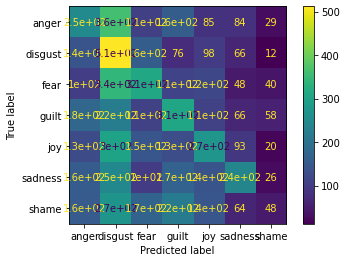

In [35]:
clf.fit(X, y)
plot_confusion_matrix(clf, X, y)
plt.show()